# Données Exif - Corrigé

## Présentation

Les données Exif sont des _méta-données_ enregistrées par certains appareils photos et données des informations sur l'image.

On peut les lire facilement à partir de PIL :

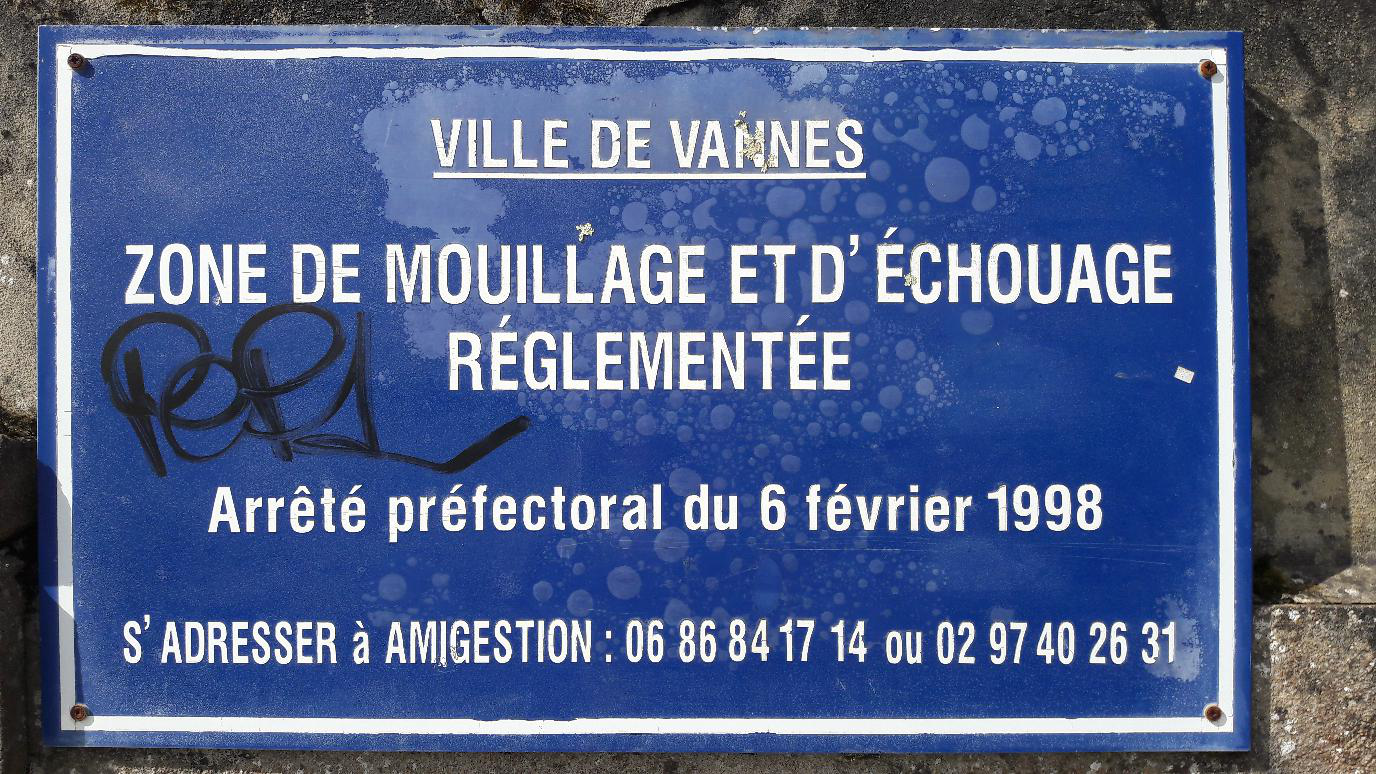

In [1]:
from PIL import Image

img = Image.open("1.jpg")

img

In [2]:
exif = img._getexif()

exif

{256: 4128,
 257: 2322,
 34853: {0: b'\x02\x02\x00\x00',
  1: 'N',
  2: ((47, 1), (37, 1), (44, 1)),
  3: 'W',
  4: ((2, 1), (46, 1), (41, 1)),
  5: b'\x00',
  6: (59, 1),
  7: ((9, 1), (10, 1), (47, 1)),
  29: '2019:04:27'},
 296: 2,
 34665: 237,
 271: 'samsung',
 272: 'SM-A510F',
 305: 'A510FXXU7CRL2',
 274: 1,
 306: '2019:04:27 11:10:47',
 531: 1,
 282: (72, 1),
 283: (72, 1),
 36864: b'0220',
 37377: (1060, 100),
 37378: (185, 100),
 36867: '2019:04:27 11:10:47',
 36868: '2019:04:27 11:10:47',
 37379: (844, 100),
 37380: (0, 10),
 37381: (185, 100),
 37383: 2,
 37385: 0,
 37386: (370, 100),
 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 40961: 1,
 40962: 4128,
 41989: 28,
 41990: 0,
 40963: 2322,
 33434: (1, 1550),
 33437: (19, 10),
 42016: 'U13LLIA00VM U13LLKI01SA\n\x00\x00\x00\x00\x00',
 34850: 2,
 34855: 40,
 41986: 0,
 40960: b'0100',
 41987: 0,
 37500: b'\x07\x00\x01\x00\x07\x00\x04\x00\x00\x000100\x02\x00\x04\x00\x01\x00\x00\

Comme on peut le voir, on a beaucoup d'informations mais les clés ne sont pas claires... On va importer les TAGS_EXIFS afin de les modifier :

In [3]:
from PIL.ExifTags import TAGS, GPSTAGS

img = Image.open("1.jpg")

exif = {
    TAGS[k]: v
    for k, v in img._getexif().items()
    if k in TAGS
}


exif["GPSInfo"] = {
    GPSTAGS[k] : v
    for k, v in exif["GPSInfo"].items()
    if k in GPSTAGS
}

exif

{'ImageWidth': 4128,
 'ImageLength': 2322,
 'GPSInfo': {'GPSVersionID': b'\x02\x02\x00\x00',
  'GPSLatitudeRef': 'N',
  'GPSLatitude': ((47, 1), (37, 1), (44, 1)),
  'GPSLongitudeRef': 'W',
  'GPSLongitude': ((2, 1), (46, 1), (41, 1)),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': (59, 1),
  'GPSTimeStamp': ((9, 1), (10, 1), (47, 1)),
  'GPSDateStamp': '2019:04:27'},
 'ResolutionUnit': 2,
 'ExifOffset': 237,
 'Make': 'samsung',
 'Model': 'SM-A510F',
 'Software': 'A510FXXU7CRL2',
 'Orientation': 1,
 'DateTime': '2019:04:27 11:10:47',
 'YCbCrPositioning': 1,
 'XResolution': (72, 1),
 'YResolution': (72, 1),
 'ExifVersion': b'0220',
 'ShutterSpeedValue': (1060, 100),
 'ApertureValue': (185, 100),
 'DateTimeOriginal': '2019:04:27 11:10:47',
 'DateTimeDigitized': '2019:04:27 11:10:47',
 'BrightnessValue': (844, 100),
 'ExposureBiasValue': (0, 10),
 'MaxApertureValue': (185, 100),
 'MeteringMode': 2,
 'Flash': 0,
 'FocalLength': (370, 100),
 'UserComment': b'\x00\x00\x00\x00\x00\x00\x00\x00\

L'ensemble de cette démarche est reprise dans la fonction ``get_exif`` du module ``ouitlsImage`` :

In [4]:
from outilsImage import *

exif = get_exif_data(img)

exif

{'ImageWidth': 4128,
 'ImageLength': 2322,
 'GPSInfo': {'GPSVersionID': b'\x02\x02\x00\x00',
  'GPSLatitudeRef': 'N',
  'GPSLatitude': ((47, 1), (37, 1), (44, 1)),
  'GPSLongitudeRef': 'W',
  'GPSLongitude': ((2, 1), (46, 1), (41, 1)),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': (59, 1),
  'GPSTimeStamp': ((9, 1), (10, 1), (47, 1)),
  'GPSDateStamp': '2019:04:27'},
 'ResolutionUnit': 2,
 'ExifOffset': 237,
 'Make': 'samsung',
 'Model': 'SM-A510F',
 'Software': 'A510FXXU7CRL2',
 'Orientation': 1,
 'DateTime': '2019:04:27 11:10:47',
 'YCbCrPositioning': 1,
 'XResolution': (72, 1),
 'YResolution': (72, 1),
 'ExifVersion': b'0220',
 'ShutterSpeedValue': (1060, 100),
 'ApertureValue': (185, 100),
 'DateTimeOriginal': '2019:04:27 11:10:47',
 'DateTimeDigitized': '2019:04:27 11:10:47',
 'BrightnessValue': (844, 100),
 'ExposureBiasValue': (0, 10),
 'MaxApertureValue': (185, 100),
 'MeteringMode': 2,
 'Flash': 0,
 'FocalLength': (370, 100),
 'UserComment': b'\x00\x00\x00\x00\x00\x00\x00\x00\

On peut alors directement récupérer la latitude les coordonnées géographiques de la photo :

In [8]:
coordonnees_gps = get_lat_lon(exif)

Pour finir on affiche les coordonnées sur une carte !

In [20]:
# importation le module
import folium

# création d'une carte. On donne en argument :
# -> La localisation à l'aide des coorodnnées GPS
# -> le degré de zoom initial (facultatif)
# D'autres options sont disponibles. Consulter la documentation
carte = folium.Map(location=coordonnees_gps, zoom_start=12)


# Ajouter une punaise
folium.Marker(coordonnees_gps, popup='<i>Ma Photo</i>').add_to(carte)

carte

## Au travail

Le dossier ``/photos`` contient des photos récupérées sur le net ayant des coordonnées GPS.

Charger ces photos et afficher leurs coordonnées sur une carte.

In [42]:
import os, fnmatch

def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

photos = find('*.jpg', 'photos')

carte = folium.Map(location=(0,0), zoom_start=2)

for photo in photos :
    img = Image.open(photo)
    exif = get_exif_data(img)
    coordonnees_gps = get_lat_lon(exif)
    folium.Marker(coordonnees_gps, popup='<i>Photo</i>').add_to(carte)

carte